In [ ]:
import numpy as np
import pandas as pd
import csv
from csv import reader

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/My Drive/topic modelling dataset/blog1.csv")
data.head()

,processed_text
0,info page file wait until team leader process ...
1,team member drew laag urllink mail ruiyu urlli...
2,kader kernfusi aard maak eigen waterstofbom bu...
3,test test
4,thank yahoo toolbar captur url popup mean cool...


In [ ]:
print(len(data.axes[0]))


170321


In [ ]:
import sys
csv.field_size_limit(sys.maxsize)

texts=[]
with open ("/content/drive/My Drive/topic modelling dataset/blog1.csv",'r') as read_obj:
  csv_reader=reader(read_obj)
  for row in csv_reader:
    texts.append(row)
print(len(texts))

170322


In [ ]:
print(texts[0])
texts=texts[1:]

['processed_text']


In [ ]:
import nltk
nltk.download("punkt")
nltk.download("popular")
from nltk.tokenize import RegexpTokenizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    | 

In [ ]:
#Tokenization (final step in our cleaning of data) is performed using Regular Expression Tokeinzer from nltk package. 
tokenizer = RegexpTokenizer(r'\w+') #matches all word characters until a non word character like " " is found.
text=[]
for i in texts:
  #tokenize the document string
  tokens=tokenizer.tokenize(str(i))
  text.append(tokens)

In [ ]:
print(text[0])

['info', 'page', 'file', 'wait', 'until', 'team', 'leader', 'process', 'learn', 'html']


In [ ]:
#creating bag of words parameter
import gensim
from gensim import corpora,models

#Dictionary() function creates a term dictionary of our corpus, where every unique term is assigned an index and word count is also maintained.
dictionary = corpora.Dictionary(text)

# print(dictionary.token2id) can be used to see each unique id assigned to each unique word.

#Converts list of documents (corpus) into bag of words using dictionary prepared above. Output is a list of list of tuples with first tern the unique id and the second term the frequency.
doc_term_matrix = [dictionary.doc2bow(abst, allow_update=True) for abst in text]

**Number of topics=8**

In [ ]:
# lda_model = gensim.models.LdaMulticore(doc_term_matrix, num_topics=8, id2word=dictionary, passes=1, workers=3)
# for idx, topic in lda_model.print_topics(-1):
#   print('Topic: {} \nWords: {}'.format(idx, topic))

**Finding the Coherence Model Graph**

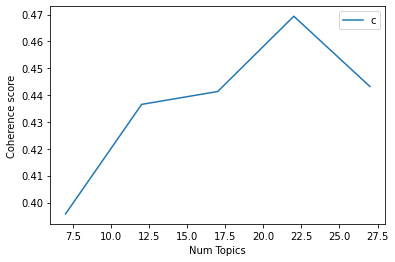

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=gensim.models.LdaMulticore(corpus=doc_term_matrix, num_topics=num_topics, id2word=dictionary, passes=1, workers=2)
        #model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=text, start=7, limit=30, step=5)
# Show graph
import matplotlib.pyplot as plt
limit=30; start=7; step=5;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
for m,cv in zip(x,coherence_values):
  print("Number of Topics "+str(m)+"has coherence value "+str(round(cv,4)))

Number of Topics 7has coherence value 0.3957
Number of Topics 12has coherence value 0.4365
Number of Topics 17has coherence value 0.4413
Number of Topics 22has coherence value 0.4694
Number of Topics 27has coherence value 0.4432


**LDA Model and Visualisation for k=22**

In [21]:
lda_model = gensim.models.LdaMulticore(doc_term_matrix, num_topics=22, id2word=dictionary, passes=1, workers=3)
for idx, topic in lda_model.print_topics(-1):
  print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.020*"blog" + 0.016*"post" + 0.012*"write" + 0.007*"link" + 0.007*"site" + 0.007*"like" + 0.007*"read" + 0.007*"urllink" + 0.007*"page" + 0.005*"know"
Topic: 1 
Words: 0.012*"work" + 0.010*"email" + 0.008*"mail" + 0.008*"time" + 0.007*"like" + 0.007*"send" + 0.007*"week" + 0.006*"think" + 0.006*"good" + 0.006*"post"
Topic: 2 
Words: 0.015*"live" + 0.014*"life" + 0.012*"peopl" + 0.010*"love" + 0.010*"know" + 0.010*"time" + 0.009*"year" + 0.009*"world" + 0.007*"come" + 0.006*"want"
Topic: 3 
Words: 0.010*"bush" + 0.009*"peopl" + 0.008*"american" + 0.007*"state" + 0.007*"say" + 0.006*"urllink" + 0.006*"presid" + 0.006*"countri" + 0.005*"kerri" + 0.005*"nation"
Topic: 4 
Words: 0.023*"go" + 0.016*"like" + 0.013*"think" + 0.011*"today" + 0.011*"time" + 0.009*"come" + 0.009*"good" + 0.008*"night" + 0.008*"play" + 0.008*"work"
Topic: 5 
Words: 0.011*"play" + 0.011*"game" + 0.010*"peopl" + 0.010*"time" + 0.008*"go" + 0.008*"like" + 0.008*"work" + 0.007*"music" + 0.007*"think"

In [22]:
pip install pyLDAvis

     |████████████████████████████████| 1.6MB 5.7MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=5786e32af8de327bb4b3035b807f27f8689c2840cffb1fe31e6707ad016ca6d8
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [23]:
import pyLDAvis
import pyLDAvis.gensim 

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
17     0.075507  0.063000       1        1  19.603670
4      0.046633  0.124470       2        1   9.859819
14     0.020786  0.164205       3        1   6.863564
3      0.060723 -0.158045       4        1   6.517401
15     0.044524  0.074637       5        1   6.140673
20     0.056896 -0.113056       6        1   5.576320
21     0.042531  0.058978       7        1   4.706086
5      0.044124  0.042862       8        1   4.480472
2      0.058915 -0.009519       9        1   4.438305
16     0.061317 -0.079059      10        1   4.432627
1      0.038574 -0.042355      11        1   4.150068
8      0.055192 -0.114724      12        1   4.125191
0      0.021157 -0.115130      13        1   3.195849
18     0.012188  0.088679      14        1   3.117774
11     0.049261 -0.101289      15        1   2.362611
10    -0.056283 -0.001745      16        1   1.897354
6     -0.007960  0.022963      17        1   1.866911
7     -0.051583 -0.002340      18        1   1.763238
12    -0.011647  0.075334      19        1   1.707078
13    -0.416484 -0.037248      20        1   1.156019
9     -0.017924  0.063466      21        1   1.146125
19    -0.126445 -0.004084      22        1   0.892845, topic_info=         Term           Freq          Total Category  logprob  loglift
2779     nbsp  101990.000000  101990.000000  Default  30.0000  30.0000
17    urllink   89127.000000   89127.000000  Default  29.0000  29.0000
585      movi   21743.000000   21743.000000  Default  28.0000  28.0000
382        go  119183.000000  119183.000000  Default  27.0000  27.0000
1457     love   59253.000000   59253.000000  Default  26.0000  26.0000
...       ...            ...            ...      ...      ...      ...
503      know     221.898582  105936.918544  Topic22  -6.2243  -1.4499
512      leav     204.735887   35531.854470  Topic22  -6.3048  -0.4380
532      look     205.913344   53179.713007  Topic22  -6.2991  -0.8355
1304    night     201.812584   37341.065645  Topic22  -6.3192  -0.5020
891      take     201.339118   34410.854774  Topic22  -6.3216  -0.4226

[2072 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
7421      17  0.035080  aaahhh
7421      19  0.912081  aaahhh
17542      1  0.093335    abbi
17542      2  0.069335    abbi
17542      3  0.016000    abbi
...      ...       ...     ...
25317     13  0.897131    zine
25317     14  0.011356    zine
25317     17  0.011356    zine
30632      4  0.980269  zoolog
37421     10  0.969591    zwan

[15267 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[18, 5, 15, 4, 16, 21, 22, 6, 3, 17, 2, 9, 1, 19, 12, 11, 7, 8, 13, 14, 10, 20])

**LDA Model and Visualisation for k=12**

In [24]:
lda_model = gensim.models.LdaMulticore(doc_term_matrix, num_topics=12, id2word=dictionary, passes=1, workers=3)
for idx, topic in lda_model.print_topics(-1):
  print('Topic: {} \nWords: {}'.format(idx, topic))

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

Topic: 0 
Words: 0.015*"game" + 0.013*"go" + 0.011*"think" + 0.011*"play" + 0.010*"like" + 0.009*"time" + 0.009*"work" + 0.007*"thing" + 0.007*"come" + 0.007*"say"
Topic: 1 
Words: 0.023*"go" + 0.013*"time" + 0.013*"work" + 0.012*"today" + 0.010*"good" + 0.009*"home" + 0.009*"like" + 0.009*"school" + 0.008*"week" + 0.007*"think"
Topic: 2 
Words: 0.018*"urllink" + 0.011*"movi" + 0.009*"like" + 0.008*"read" + 0.008*"good" + 0.007*"post" + 0.007*"think" + 0.007*"know" + 0.007*"time" + 0.007*"book"
Topic: 3 
Words: 0.005*"time" + 0.004*"say" + 0.004*"urllink" + 0.004*"year" + 0.003*"come" + 0.003*"know" + 0.003*"life" + 0.003*"open" + 0.003*"offic" + 0.002*"servic"
Topic: 4 
Words: 0.018*"like" + 0.008*"go" + 0.007*"look" + 0.007*"know" + 0.006*"think" + 0.006*"time" + 0.005*"come" + 0.005*"good" + 0.004*"drink" + 0.004*"thing"
Topic: 5 
Words: 0.312*"nbsp" + 0.007*"go" + 0.006*"time" + 0.006*"think" + 0.006*"like" + 0.005*"know" + 0.004*"thing" + 0.004*"come" + 0.003*"want" + 0.003*"work"

In [25]:
import pyLDAvis
import pyLDAvis.gensim 

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.096736  0.013523       1        1  20.210403
4      0.082410 -0.025989       2        1  14.396320
1      0.076604 -0.037171       3        1  11.256482
10    -0.066990  0.145410       4        1   8.908275
9      0.122553 -0.104558       5        1   8.785404
2     -0.020560  0.001099       6        1   8.508300
0      0.073293 -0.007370       7        1   6.957177
8     -0.086352  0.132913       8        1   5.890005
11     0.049642 -0.034380       9        1   5.833603
3     -0.049155  0.098009      10        1   4.646282
7     -0.314343 -0.146541      11        1   2.370214
5      0.036161 -0.034945      12        1   2.237536, topic_info=         Term           Freq          Total Category  logprob  loglift
2779     nbsp   89917.000000   89917.000000  Default  30.0000  30.0000
17    urllink   89398.000000   89398.000000  Default  29.0000  29.0000
1457     love   60428.000000   60428.000000  Default  28.0000  28.0000
382        go  120418.000000  120418.000000  Default  27.0000  27.0000
370      game   17750.000000   17750.000000  Default  26.0000  26.0000
...       ...            ...            ...      ...      ...      ...
881      sure     477.380719   23211.521828  Topic12  -6.3770  -0.0843
527     littl     515.057867   36105.057779  Topic12  -6.3010  -0.4501
530      long     477.843641   26601.993362  Topic12  -6.3760  -0.2197
120      call     429.186720   21111.502707  Topic12  -6.4834  -0.0959
1106     talk     465.283763   36929.460245  Topic12  -6.4026  -0.5743

[1196 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
24662      2  0.013851  abbott
24662      8  0.955710  abbott
24662     10  0.027702  abbott
40287      3  0.986126    abel
14357      1  0.144448   abort
...      ...       ...     ...
5912       2  0.067773   zelda
5912       3  0.011296   zelda
5912       5  0.011296   zelda
5912       6  0.039534   zelda
5912       7  0.864109   zelda

[5988 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 5, 2, 11, 10, 3, 1, 9, 12, 4, 8, 6])

**LDA Model and Visualisation for k=17**



In [30]:
lda_model = gensim.models.LdaMulticore(doc_term_matrix, num_topics=17, id2word=dictionary, passes=1, workers=3)
for idx, topic in lda_model.print_topics(-1):
  print('Topic: {} \nWords: {}'.format(idx, topic))

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

Topic: 0 
Words: 0.181*"urllink" + 0.011*"http" + 0.011*"nbsp" + 0.007*"lang" + 0.005*"site" + 0.004*"naman" + 0.004*"link" + 0.004*"hindi" + 0.004*"kung" + 0.004*"pictur"
Topic: 1 
Words: 0.020*"haha" + 0.017*"go" + 0.013*"like" + 0.008*"today" + 0.007*"come" + 0.007*"happi" + 0.006*"time" + 0.006*"home" + 0.006*"damn" + 0.005*"hehe"
Topic: 2 
Words: 0.005*"yang" + 0.005*"para" + 0.004*"pero" + 0.003*"phone" + 0.003*"blah" + 0.003*"appl" + 0.003*"todo" + 0.003*"jack_leido" + 0.003*"como" + 0.002*"know"
Topic: 3 
Words: 0.013*"time" + 0.011*"go" + 0.009*"good" + 0.007*"week" + 0.007*"work" + 0.007*"like" + 0.006*"thing" + 0.006*"year" + 0.005*"look" + 0.005*"night"
Topic: 4 
Words: 0.016*"urllink" + 0.007*"like" + 0.006*"know" + 0.006*"look" + 0.006*"go" + 0.005*"think" + 0.005*"drive" + 0.004*"pictur" + 0.004*"work" + 0.004*"time"
Topic: 5 
Words: 0.018*"read" + 0.016*"blog" + 0.014*"book" + 0.012*"game" + 0.012*"post" + 0.011*"time" + 0.010*"write" + 0.009*"work" + 0.008*"like" + 0.0

In [31]:
import pyLDAvis
import pyLDAvis.gensim 

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.112764  0.028572       1        1  17.665620
3      0.069556  0.002312       2        1  10.533974
16     0.044404 -0.092738       3        1   8.926089
8     -0.107010 -0.173035       4        1   8.817886
14     0.090975  0.063488       5        1   8.045805
7     -0.020131 -0.133026       6        1   7.707814
5      0.010611 -0.029474       7        1   6.953358
10     0.036707  0.010382       8        1   5.622135
4      0.010839  0.008472       9        1   4.855684
6      0.070823 -0.018147      10        1   4.801827
12     0.079880  0.050148      11        1   3.758862
1      0.084488  0.152183      12        1   3.370068
11     0.055943  0.006491      13        1   2.897174
15    -0.010902 -0.029523      14        1   2.015545
0     -0.219955  0.095657      15        1   1.872375
13    -0.073799 -0.049080      16        1   1.258379
2     -0.235192  0.107317      17        1   0.897406, topic_info=         Term           Freq          Total Category  logprob  loglift
2779     nbsp   90904.000000   90904.000000  Default  30.0000  30.0000
17    urllink   88550.000000   88550.000000  Default  29.0000  29.0000
1457     love   56446.000000   56446.000000  Default  28.0000  28.0000
523      like  140845.000000  140845.000000  Default  27.0000  27.0000
1450     haha   11195.000000   11195.000000  Default  26.0000  26.0000
...       ...            ...            ...      ...      ...      ...
523      like     245.284216  140845.347159  Topic17  -6.1292  -1.6396
646     peopl     208.307871   68423.634002  Topic17  -6.2926  -1.0810
385      good     203.765256   66290.272103  Topic17  -6.3147  -1.0714
211    custom     170.460612    2630.877110  Topic17  -6.4931   1.9768
382        go     183.517887  122226.124323  Topic17  -6.4193  -1.7879

[1618 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
58311      8  0.013731  aardvark
58311     11  0.082388  aardvark
58311     16  0.878805  aardvark
24662      2  0.040886    abbott
24662     11  0.930148    abbott
...      ...       ...       ...
27106      1  0.971363  zatoichi
72630      1  0.974478      zeke
16942     13  0.984554       zeu
17003     11  0.983572     zippi
30632      2  0.980335    zoolog

[10204 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 4, 17, 9, 15, 8, 6, 11, 5, 7, 13, 2, 12, 16, 1, 14, 3])

**Most Frequent Words in the Corpus**

In [28]:
#This is done to check whether the topics provided by our LDA Model have any relation with the most frequent words in the corpus.
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

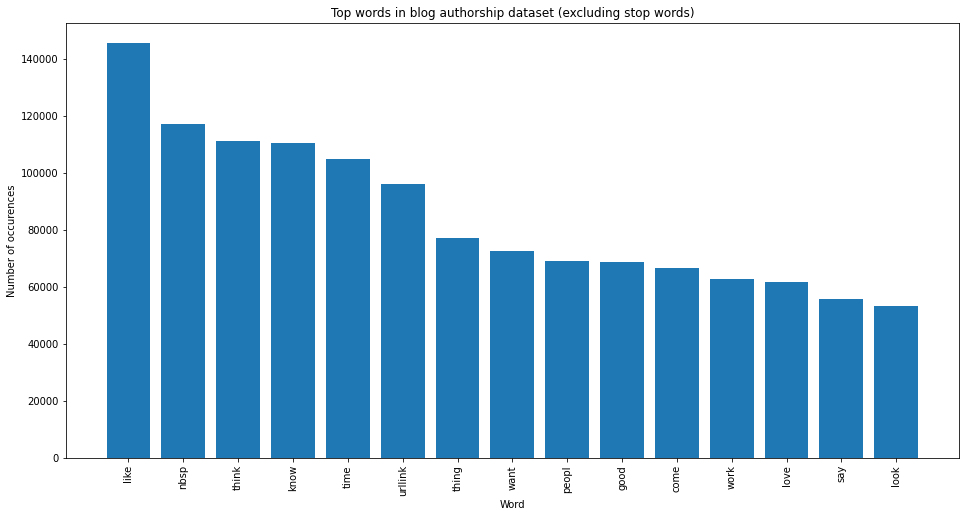

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
t = data['processed_text'].astype(str)
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=t)

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in blog authorship dataset (excluding stop words)');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()